### 导入数据，简单查看数据

In [14]:
import pandas as pd
titanic = pd.read_csv('titanic_train.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#查看数据
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [16]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [17]:
print('age:',titanic['Age'].unique())
print('sex:',titanic['Sex'].unique())
print('embarked:',titanic['Embarked'].unique())

age: [ 22.    38.    26.    35.    28.    54.     2.    27.    14.     4.    58.
  20.    39.    55.    31.    34.    15.     8.    19.    40.    66.    42.
  21.    18.     3.     7.    49.    29.    65.    28.5    5.    11.    45.
  17.    32.    16.    25.     0.83  30.    33.    23.    24.    46.    59.
  71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5   51.    55.5
  40.5   44.     1.    61.    56.    50.    36.    45.5   20.5   62.    41.
  52.    63.    23.5    0.92  43.    60.    10.    64.    13.    48.     0.75
  53.    57.    80.    70.    24.5    6.     0.67  30.5    0.42  34.5   74.  ]
sex: ['male' 'female']
embarked: ['S' 'C' 'Q' nan]


### 数据特征，数值化处理

In [18]:
#处理性别特征
titanic.loc[titanic['Sex'] == 'male','Sex'] =0
titanic.loc[titanic['Sex'] == 'female','Sex'] =1
print('sex:',titanic['Sex'].unique())

sex: [0 1]


In [19]:
#处理Emabarked
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked'] == 'S', 'Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C', 'Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q', 'Embarked'] = 2
print (titanic['Embarked'].unique())

[0 1 2]


### 使用线性回归模型

In [20]:
# 导入线性分类器
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

lr = LinearRegression()

#交叉验证
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
print(kf)

predictions = []
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (titanic[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = titanic['Survived'].iloc[train]
    
    # Training the algorithm using the predictors and target.
    lr.fit(train_predictors, train_target)
    
    # We can now make predictions on the test fold
    test_predictions = lr.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)
print(len(predictions))
print(type(predictions[1]))
#print(predictions)


sklearn.cross_validation.KFold(n=891, n_folds=3, shuffle=False, random_state=1)
3
<class 'numpy.ndarray'>


In [21]:
import numpy as np

#合并交叉验证后的三次数据预测结果
predictions = np.concatenate([predictions], axis = 0)
print(predictions[:20])



[[  8.99877810e-02   9.60756206e-01   5.92676278e-01   9.31138728e-01
    5.29343071e-02   1.70275685e-01   3.69943590e-01   1.03474847e-01
    5.21597906e-01   8.74491050e-01   6.48883611e-01   8.29742769e-01
    1.34797198e-01  -1.61126844e-01   6.58141307e-01   6.39819748e-01
    1.51733875e-01   2.95432718e-01   5.35377959e-01   6.21007683e-01
    2.61872592e-01   2.62687561e-01   7.31739160e-01   5.05995897e-01
    5.61398567e-01   3.35039734e-01   1.30338808e-01   4.68765767e-01
    6.60737753e-01   9.10819218e-02   4.77223920e-01   1.04220026e+00
    6.60691613e-01   8.71539273e-02   5.28550732e-01   4.01874338e-01
    1.30340307e-01   1.29339672e-01   5.72717129e-01   6.65238822e-01
    4.83215779e-01   7.60807408e-01   1.30578363e-01   8.71867121e-01
    7.09855487e-01   9.11369897e-02   1.39181745e-01   6.60691613e-01
    6.82833485e-02   6.06254374e-01   4.92254383e-02   1.29250392e-01
    9.02668258e-01   7.51677954e-01   3.19636822e-01   5.05995897e-01
    8.23411477e-01  

In [22]:
from sklearn.metrics import classification_report
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0
predictions = [j for i in range(3) for j in predictions[i]]
print(type(predictions))
sur = titanic['Survived']
print(type(sur))
y_ture = sur.as_matrix()
# print(type(y_ture))
count = classification_report(y_ture,predictions,target_names=['0','1'])
print(count)

<class 'list'>
<class 'pandas.core.series.Series'>
             precision    recall  f1-score   support

          0       0.81      0.85      0.83       549
          1       0.74      0.68      0.71       342

avg / total       0.78      0.78      0.78       891



### 使用逻辑回归模型

In [23]:
#导入逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
lg = LogisticRegression()

scores = cross_validation.cross_val_score(lg, titanic[predictors], titanic['Survived'], cv = 3)
print(scores.mean())
print(type(titanic[predictors]))

0.787878787879
<class 'pandas.core.frame.DataFrame'>


### 使用随机森林分类器

In [17]:
#导入随机森林分类器
from sklearn.ensemble import RandomForestClassifier
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
#初始化随机森林数，并设置参数
alg = RandomForestClassifier(min_samples_split=2, min_samples_leaf=1,random_state=1)
#初始化交叉验证模块，设置交叉验证参数
kf = cross_validation.KFold(titanic.shape[0],n_folds=3,random_state=1)
#开始训练模型，并得出分数
score = cross_validation.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv = kf)
print(scores.mean())

0.787878787879


In [18]:
#改变随机森林数 参数-->数的数量-->100
alg = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=4, min_samples_leaf=2)
kf = cross_validation.KFold(titanic.shape[0], 3, random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf)

print(scores.mean())

0.814814814815


In [19]:
#进一步数据处理
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

In [20]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pd.value_counts(titles))

# Add in the title column.
titanic["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Lady          1
Mme           1
Capt          1
Ms            1
Sir           1
Countess      1
Don           1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


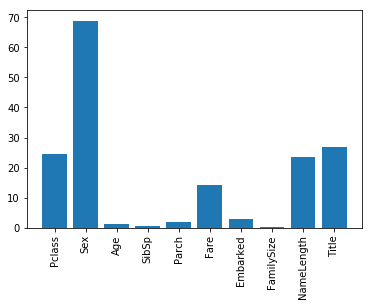

In [21]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "NameLength",'Title']

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()



In [22]:
# 选取最重要的五个特征
new_predictors = ['Pclass', 'Sex', 'Fare','Title','NameLength','Age','Embarked']

In [23]:
def scores_k(k):
    #改变随机森林数 参数-->数的数量-->k
    alg = RandomForestClassifier(random_state=1, n_estimators=k, min_samples_split=4, min_samples_leaf=2)
    kf = cross_validation.KFold(titanic.shape[0], 3, random_state=1)
    scores = cross_validation.cross_val_score(alg, titanic[new_predictors], titanic["Survived"], cv=kf)
    return scores.mean()

In [24]:
list_scorces = []
for i in range(2,120):
    re_scorces = scores_k(i)
    print(re_scorces)
    list_scorces.append(re_scorces)  


0.817059483726
0.811447811448
0.820426487093
0.820426487093
0.827160493827
0.822671156004
0.826038159371
0.822671156004
0.820426487093
0.822671156004
0.820426487093
0.821548821549
0.822671156004
0.818181818182
0.821548821549
0.822671156004
0.82379349046
0.827160493827
0.824915824916
0.822671156004
0.826038159371
0.819304152637
0.824915824916
0.822671156004
0.82379349046
0.827160493827
0.827160493827
0.827160493827
0.829405162738
0.829405162738
0.824915824916
0.82379349046
0.830527497194
0.829405162738
0.83164983165
0.832772166105
0.832772166105
0.83164983165
0.832772166105
0.833894500561
0.83164983165
0.83164983165
0.832772166105
0.832772166105
0.830527497194
0.83164983165
0.835016835017
0.830527497194
0.83164983165
0.833894500561
0.833894500561
0.835016835017
0.836139169473
0.83950617284
0.837261503928
0.840628507295
0.83950617284
0.83950617284
0.835016835017
0.833894500561
0.832772166105
0.833894500561
0.833894500561
0.837261503928
0.841750841751
0.840628507295
0.840628507295
0.83950

118
118


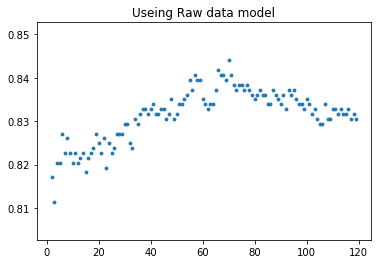

In [25]:
#画散点图，查看趋势
%matplotlib inline
import matplotlib.pyplot as plt
print(len(list_scorces))
k = range(2,120)
print(len(k))
plt.scatter(k,list_scorces,s=8.0)
plt.title('Useing Raw data model')


In [26]:
max_index = list_scorces.index(max(list_scorces))
print('最优得分：',max(list_scorces))
print('最大决策树数：',max_index+2)

最优得分： 0.843995510662
最大决策树数： 70


#### 梯度上升法

In [27]:
#切分数据
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic[new_predictors], titanic["Survived"], test_size=0.25, random_state=33)

#查看数据
print(y_train.value_counts())
print(y_test.value_counts())

0    415
1    253
Name: Survived, dtype: int64
0    134
1     89
Name: Survived, dtype: int64


In [28]:
# 使用梯度提升决策树预测分析
from sklearn.ensemble import GradientBoostingClassifier
# X_train = titanic[new_predictors]
# y_train = titanic["Survived"]
# X_test = titanic[new_predictors]
# y_test = titanic["Survived"]
gbc = GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(X_train, y_train)
gbc_y_pred = gbc.predict(X_test)

In [29]:
#导入classification_report。
from sklearn.metrics import classification_report

# 输出预测准确性。
print ('使用梯度提升模型：',gbc.score(X_test, y_test))
# 输出混淆矩阵
print (classification_report(gbc_y_pred, y_test, target_names = ['died', 'survived']))


使用梯度提升模型： 0.865470852018
             precision    recall  f1-score   support

       died       0.93      0.86      0.89       146
   survived       0.76      0.88      0.82        77

avg / total       0.87      0.87      0.87       223



### 最终
    线性回归<逻辑回归<决策树<随机森林< GradientBoostingClassifier（梯度提升）